<a href="https://colab.research.google.com/github/Caloca24/Pycaret_Udemy_Course/blob/main/Sentimentanalysis_Textblob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analysis of Financial News
In this exercise, we will work with a set of articles pertaining to financial news. The dataset being used already contains sentiment ratings, we will use Textblob's sentiment analysis function to determine the polarity. We will compare the ratings in the original dataset.
We will then after cleaning the text and tokenising the text, generate wordclouds for positive, negative and neutral sentiment and try to get a view on the sectors, places mentioned in the positive, neutral and negative articles.

#Workflow
1. Undertake necessary installations and explore the dataset
2. Textblob's sentiment analysis, then compare the results with the existent ratings
3. Clean the text using neattext
4. Use wordcloud to help us skim the content of the financial articles. Generate a list of custom words to be able to remove unnecessary words which do not help us understand what the news articles are about

#Part 1: Necessary installations, load the dataset and explore the dataset

In [1]:
#install textblob
!pip install textblob


In [2]:
#import pandas, textblob, and seaborn
import pandas as pd
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from google.colab import files
uploaded = files.upload()

Saving FinancialNewsDataset.csv to FinancialNewsDataset (2).csv


In [7]:
import io
df = pd.read_csv(io.BytesIO(uploaded['FinancialNewsDataset (2).csv']),  encoding='latin-1',  names=["Rating", "Headline"])
print(df.head())

     Rating                                           Headline
0   neutral  According to Gran , the company has no plans t...
1   neutral  Technopolis plans to develop in stages an area...
2  negative  The international electronic industry company ...
3  positive  With the new production plant the company woul...
4  positive  According to the company 's updated strategy f...


In [8]:
#print out the columns
df.columns

Index(['Rating', 'Headline'], dtype='object')

In [9]:
#unique values in the rating column
df.Rating.unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [10]:
b#determine the shape of the dataset
df.shape

(4846, 2)

<Axes: xlabel='Rating', ylabel='count'>

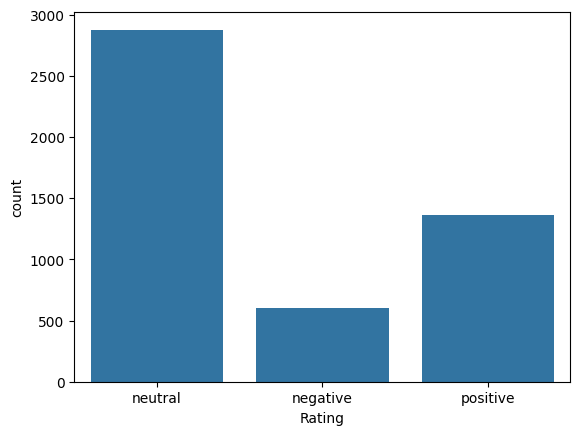

In [11]:
fin#generate a countplot
#pass the variable of interest
sns.countplot(x=df['Rating'])


#Part 2: Sentiment Analysis with Textblob

In [12]:
##define a function fin_news
def fin_news(text):
  #create a textblob object
  blob = TextBlob(text)
  #obtain the polarity score
  score= blob.sentiment.polarity
  #generate an if-elif-else
  if score > 0:
    result = 'positive'
  elif score < 0:
    result = 'negative'
  else:
    result = 'neutral'
  return result


In [13]:
#testing fin_news function with a random statement
fin_news('I love to holiday in Shimla!')

'positive'

In [14]:
#testing fin_news function with a random statement
fin_news('I dislike turnips!')

'neutral'

In [15]:
#testing fin_news function with a random statement
fin_news('I think turnips are a terrible vegetable.')

'negative'

In [16]:
#personal
fin_news('I do not like pizza')

'neutral'

In [17]:
#apply the fin_news function to the Headline column in our dataset
df['Sent_Textblob'] = df['Headline'].apply(fin_news)

In [18]:
#check the dataframe with the new column
df.head()

,Rating,Headline,Sent_Textblob
0,neutral,"According to Gran , the company has no plans t...",neutral
1,neutral,Technopolis plans to develop in stages an area...,positive
2,negative,The international electronic industry company ...,neutral
3,positive,With the new production plant the company woul...,negative
4,positive,According to the company 's updated strategy f...,neutral


<Axes: xlabel='Sent_Textblob', ylabel='count'>

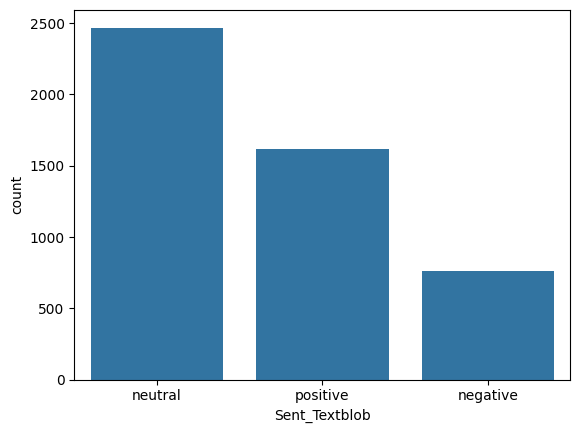

In [19]:
#generate a new countplot
sns.countplot(x=df['Sent_Textblob'])

<Axes: xlabel='Rating', ylabel='count'>

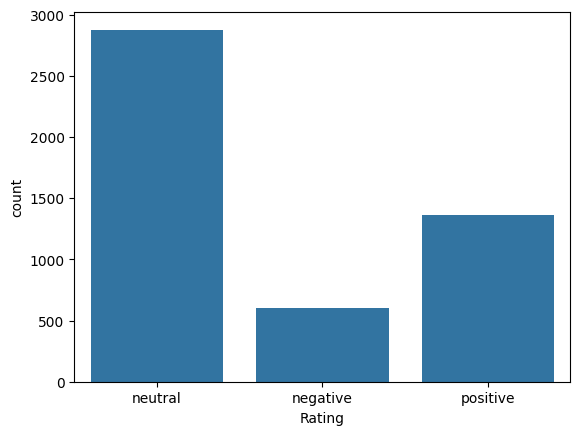

In [20]:
#show the earlier countplot for comparison
sns.countplot(x=df['Rating'])

In [21]:
#display the exact numbers
df['Sent_Textblob'].value_counts()

,count
Sent_Textblob,
neutral,2469
positive,1616
negative,761


In [22]:
#display the exact numbers
df['Rating'].value_counts()

,count
Rating,
neutral,2879
positive,1363
negative,604


#Part Three: Clean text, custom stopwords, then generate Word Clouds

In [23]:
#install neattext for text cleaning
!pip install neattext

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 6.9 MB/s eta 0:00:00


In [24]:
!#import neattext.functions
import neattext.functions as fxns

In [25]:
#subset the dataframe for positive reviews
df_positive  = df[df['Sent_Textblob']=='positive']

In [26]:
#display the positive reviews
df_positive['Headline']

,Headline
1,Technopolis plans to develop in stages an area...
5,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
8,Operating profit rose to EUR 13.1 mn from EUR ...
11,"STORA ENSO , NORSKE SKOG , M-REAL , UPM-KYMMEN..."
14,Clothing retail chain Sepp+Æl+Æ 's sales incre...
...,...
4819,"Nevertheless , the development can not be allo..."
4826,Mobile communication and wireless broadband pr...
4834,Hobby Hall 's sales decrease 26 pct due to imp...
4840,HELSINKI Thomson Financial - Shares in Cargote...


In [27]:
df_positive['Remove Stopwords'] = df_positive['Headline'].apply(fxns.remove_stopwords)

<ipython-input-27-56512ea657cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positive['Remove Stopwords'] = df_positive['Headline'].apply(fxns.remove_stopwords)


df_positive['Remove Stopwords'] = df_positive['Headline'].apply(fxns.remove_stopwords)

In [29]:
positive_tokens = [token for sentence in df_positive['Remove Stopwords'].to_list() for token in sentence.split()]
positive_tokens

['Technopolis',
 'plans',
 'develop',
 'stages',
 'area',
 '100,000',
 'square',
 'meters',
 'order',
 'host',
 'companies',
 'working',
 'computer',
 'technologies',
 'telecommunications',
 ',',
 'statement',
 'said',
 '.',
 'FINANCING',
 'ASPOCOMP',
 "'S",
 'GROWTH',
 'Aspocomp',
 'aggressively',
 'pursuing',
 'growth',
 'strategy',
 'increasingly',
 'focusing',
 'technologically',
 'demanding',
 'HDI',
 'printed',
 'circuit',
 'boards',
 'PCBs',
 '.',
 'Operating',
 'profit',
 'rose',
 'EUR',
 '13.1',
 'mn',
 'EUR',
 '8.7',
 'mn',
 'corresponding',
 'period',
 '2007',
 'representing',
 '7.7',
 '%',
 'net',
 'sales',
 '.',
 'STORA',
 'ENSO',
 ',',
 'NORSKE',
 'SKOG',
 ',',
 'M-REAL',
 ',',
 'UPM-KYMMENE',
 'Credit',
 'Suisse',
 'Boston',
 '(',
 'CFSB',
 ')',
 'raised',
 'fair',
 'value',
 'shares',
 'largest',
 'Nordic',
 'forestry',
 'groups',
 '.',
 'Clothing',
 'retail',
 'chain',
 'Sepp+Æl+Æ',
 "'s",
 'sales',
 'increased',
 '8',
 '%',
 'EUR',
 '155.2',
 'mn',
 ',',
 'operating',

#Repeat for the neutral portion of the dataset

In [30]:
#subset the neutral portion of the dataset
df_neutral  = df[df['Sent_Textblob']=='neutral']

In [31]:
df_neutral

,Rating,Headline,Sent_Textblob
0,neutral,"According to Gran , the company has no plans t...",neutral
2,negative,The international electronic industry company ...,neutral
4,positive,According to the company 's updated strategy f...,neutral
6,positive,"For the last quarter of 2010 , Componenta 's n...",neutral
7,positive,"In the third quarter of 2010 , net sales incre...",neutral
...,...,...,...
4823,neutral,It holds 38 percent of Outokumpu 's shares and...,neutral
4828,negative,"Seven-month sales of Ragutis , which is contro...",neutral
4838,negative,The company said that its comparable operating...,neutral
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...,neutral


In [32]:
df_neutral['Remove Stopwords'] = df_neutral['Headline'].str.lower().apply(fxns.remove_stopwords)

<ipython-input-32-ba888327fe38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neutral['Remove Stopwords'] = df_neutral['Headline'].str.lower().apply(fxns.remove_stopwords)


In [33]:
neutral_tokens = [token for sentence in df_neutral['Remove Stopwords'].to_list() for token in sentence.split()]
neutral_tokens

['according',
 'gran',
 ',',
 'company',
 'plans',
 'production',
 'russia',
 ',',
 'company',
 'growing',
 '.',
 'international',
 'electronic',
 'industry',
 'company',
 'elcoteq',
 'laid',
 'tens',
 'employees',
 'tallinn',
 'facility',
 ';',
 'contrary',
 'earlier',
 'layoffs',
 'company',
 'contracted',
 'ranks',
 'office',
 'workers',
 ',',
 'daily',
 'postimees',
 'reported',
 '.',
 'according',
 'company',
 "'s",
 'updated',
 'strategy',
 'years',
 '2009-2012',
 ',',
 'basware',
 'targets',
 'long-term',
 'net',
 'sales',
 'growth',
 'range',
 '20',
 '%',
 '-40',
 '%',
 'operating',
 'profit',
 'margin',
 '10',
 '%',
 '-20',
 '%',
 'net',
 'sales',
 '.',
 'quarter',
 '2010',
 ',',
 'componenta',
 "'s",
 'net',
 'sales',
 'doubled',
 'eur131m',
 'eur76m',
 'period',
 'year',
 'earlier',
 ',',
 'moved',
 'zero',
 'pre-tax',
 'profit',
 'pre-tax',
 'loss',
 'eur7m',
 '.',
 'quarter',
 '2010',
 ',',
 'net',
 'sales',
 'increased',
 '5.2',
 '%',
 'eur',
 '205.5',
 'mn',
 ',',
 'oper

#Subset the negative part of the dataset

In [34]:
df_negative  = df[df['Sent_Textblob']=='negative']

In [35]:
df_negative

,Rating,Headline,Sent_Textblob
3,positive,With the new production plant the company woul...,negative
12,positive,"A purchase agreement for 7,200 tons of gasolin...",negative
20,positive,"Lifetree was founded in 2000 , and its revenue...",negative
22,positive,MegaFon 's subscriber base increased 16.1 % in...,negative
37,positive,"Aspo Plc STOCK EXCHANGE RELEASE February 11 , ...",negative
...,...,...,...
4836,negative,"Operating profits in the half were 0.8 m , do...",negative
4837,negative,"Sales in Finland decreased by 2.0 % , and inte...",negative
4839,negative,Operating result for the 12-month period decre...,negative
4841,negative,LONDON MarketWatch -- Share prices ended lower...,negative


In [36]:
df_negative['Remove Stopwords'] = df_negative['Headline'].str.lower().apply(fxns.remove_stopwords)

<ipython-input-36-eab9df8f14f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negative['Remove Stopwords'] = df_negative['Headline'].str.lower().apply(fxns.remove_stopwords)


In [37]:
df_negative.head()

,Rating,Headline,Sent_Textblob,Remove Stopwords
3,positive,With the new production plant the company woul...,negative,new production plant company increase capacity...
12,positive,"A purchase agreement for 7,200 tons of gasolin...",negative,"purchase agreement 7,200 tons gasoline deliver..."
20,positive,"Lifetree was founded in 2000 , and its revenue...",negative,"lifetree founded 2000 , revenues risen average..."
22,positive,MegaFon 's subscriber base increased 16.1 % in...,negative,megafon 's subscriber base increased 16.1 % 20...
37,positive,"Aspo Plc STOCK EXCHANGE RELEASE February 11 , ...",negative,"aspo plc stock exchange release february 11 , ..."


In [38]:
neg_tokens = [token for sentence in df_negative['Remove Stopwords'].to_list() for token in sentence.split()]
neg_tokens

['new',
 'production',
 'plant',
 'company',
 'increase',
 'capacity',
 'meet',
 'expected',
 'increase',
 'demand',
 'improve',
 'use',
 'raw',
 'materials',
 'increase',
 'production',
 'profitability',
 '.',
 'purchase',
 'agreement',
 '7,200',
 'tons',
 'gasoline',
 'delivery',
 'hamina',
 'terminal',
 ',',
 'finland',
 ',',
 'signed',
 'neste',
 'oil',
 'oyj',
 'average',
 'platts',
 'index',
 'september',
 'plus',
 'dollars',
 'month',
 '.',
 'lifetree',
 'founded',
 '2000',
 ',',
 'revenues',
 'risen',
 'average',
 '40',
 '%',
 'margins',
 'late',
 '30s',
 '.',
 'megafon',
 "'s",
 'subscriber',
 'base',
 'increased',
 '16.1',
 '%',
 '2009',
 '50.5',
 'million',
 'users',
 'december',
 '31',
 ',',
 'market',
 'share',
 'number',
 'customers',
 'amounted',
 '24',
 '%',
 'late',
 '2009',
 ',',
 '23',
 '%',
 'late',
 '2008',
 ',',
 'according',
 'teliasonera',
 'estimates',
 '.',
 'aspo',
 'plc',
 'stock',
 'exchange',
 'release',
 'february',
 '11',
 ',',
 '2011',
 'at8',
 '.45',
 

In [39]:
!pip install wordcloud

#Update the list of stopwords
In this case, the existing list of stopwords is being updated with a list of words which are frequently found in financial articles.
These words were discovered through an iterative process by revisiting the wordcloud and eliminating the words which do not provide too much insight when taken individually (although they might have provided far more insight had they been placed within bigrams and trigrams etc)

In [40]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

#update the list of stopwords with terms which frequently occur in financial articles
current_stopwords = set(STOPWORDS)
current_stopwords.update(['company', 'companies', 'product', 'million', 'group', 'said', 'people', 'investment',
                          'quarter', 'share', 'products', 'period', 'employee', 'plant',
                          'total', 'price', 'unit', 'percent', 'customer', 'project', 'business', 'operation', 'service', 'market',
                          'year', 'sales', 'bank', 'finnish', 'finland', 'eur', 'company', 'product', 'service', 'income', 'also', 'make', 'business', 'buy',
                                       'sell', 'purchase','year', 'people', 'able', 'enable', 'small', 'revenue', 'projection', 'include', 'user',
                                        'store', 'website', 'use', 'first', 'large', 'would', 'become', 'provide', 'begin', 'operation', 'state', 'open',
                                       'group', 'corporate', 'pay', 'plan', 'design', 'world', 'build', 'produce', 'call', 'share', 'early', 'many', 'major', 'form', 'know', 'number', 'several',
                                        'name', 'may', 'later', 'announce', 'customer', 'line', 'oil', 'give',
                          'contract', 'markets', 'rose', 'equipment', 'main', 'Meeting', 'meeting', 'years', 'process',
                          'month', 'shareholder', 'level', 'corresponding', 'paper', 'time', 'includes', 'cover', 'fell', 'ltd', 'grew'
                                        'system', 'remain', 'stock', 'say', 'image', 'find', 'come', 'add',
                          'expect', 'offer', 'says', 'including', 'higher', 'cost', 'information', 'supply', 'available', 'expect', 'says',
                          'offer', 'strong', 'first', 'second', 'area', 'reported', 'related', 'estimated', 'customers', 'signed', 'including', 'grew'
                                        'relate', 'introduce', 'allow', 'light', 'release', 'locate', 'well', 'part',
                                        'need', 'serve', 'primarily', 'end', 'consumer', 'receive', 'launch', 'lead', 'center', 'hold',
                                        'develop', 'support', 'create', 'drive', 'see', 'found', 'run', 'focus', 'good', 'top', 'complete', 'former', 'addition',
                           'unit', 'market', 'work', 'access', 'order', 'day', 'see',
                                         'follow', 'reach', 'develop', 'formerly', 'report', 'take', 'file', 'new', 'take', 'city',
                                         'see', 'result', 'claim', 'deal', 'start', 'continue', 'previously', 'approximately', 'net', 'firm', 'shares', 'today',
                           'financial', 'profit', 'solution', 'min', 'pct', 'compared', 'million', 'agreement', 'base', 'operations', 'slightly', 'production',
                          'operations', 'today', 'industry', 'according', 'mln', 'euro',
'earlier', 'agreement', 'january', 'division', 'employees', 'compared', 'value', 'mn',
'shares', 'building', 'usd', 'financial', 'management', 'based', 'shares', 'solution', 'industry'  ])

##Generate the wordcloud with articles which received a negative Sentiment rating from Textblob

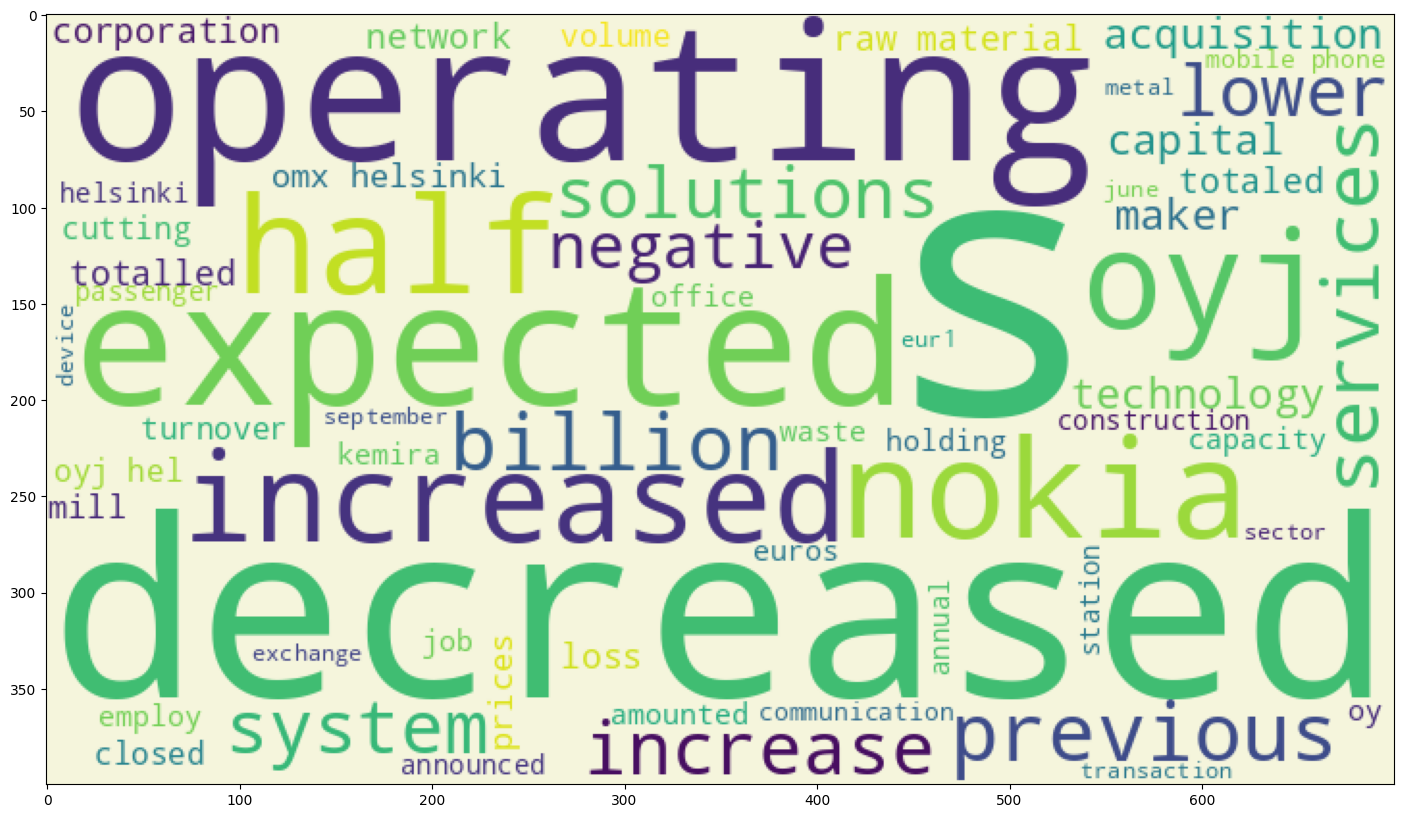

In [41]:
neg_wordcloud = WordCloud(width=700, height=400, background_color='beige', max_words=60, stopwords=current_stopwords).generate(' '.join(neg_tokens))
plt.figure(figsize=(20,10))
plt.imshow(neg_wordcloud)

#Observations from the negativeword cloud
1. Some sectors which feature are the services, communication, technology sectors, construction, metal etc.
2. The months of September and June are mentioned in particular. Would need further contextual information to understand what that could mean.
3. Companies mentioned include Nokia.

#Generate the wordcloud with articles which received a neutral Sentiment rating from Textblob

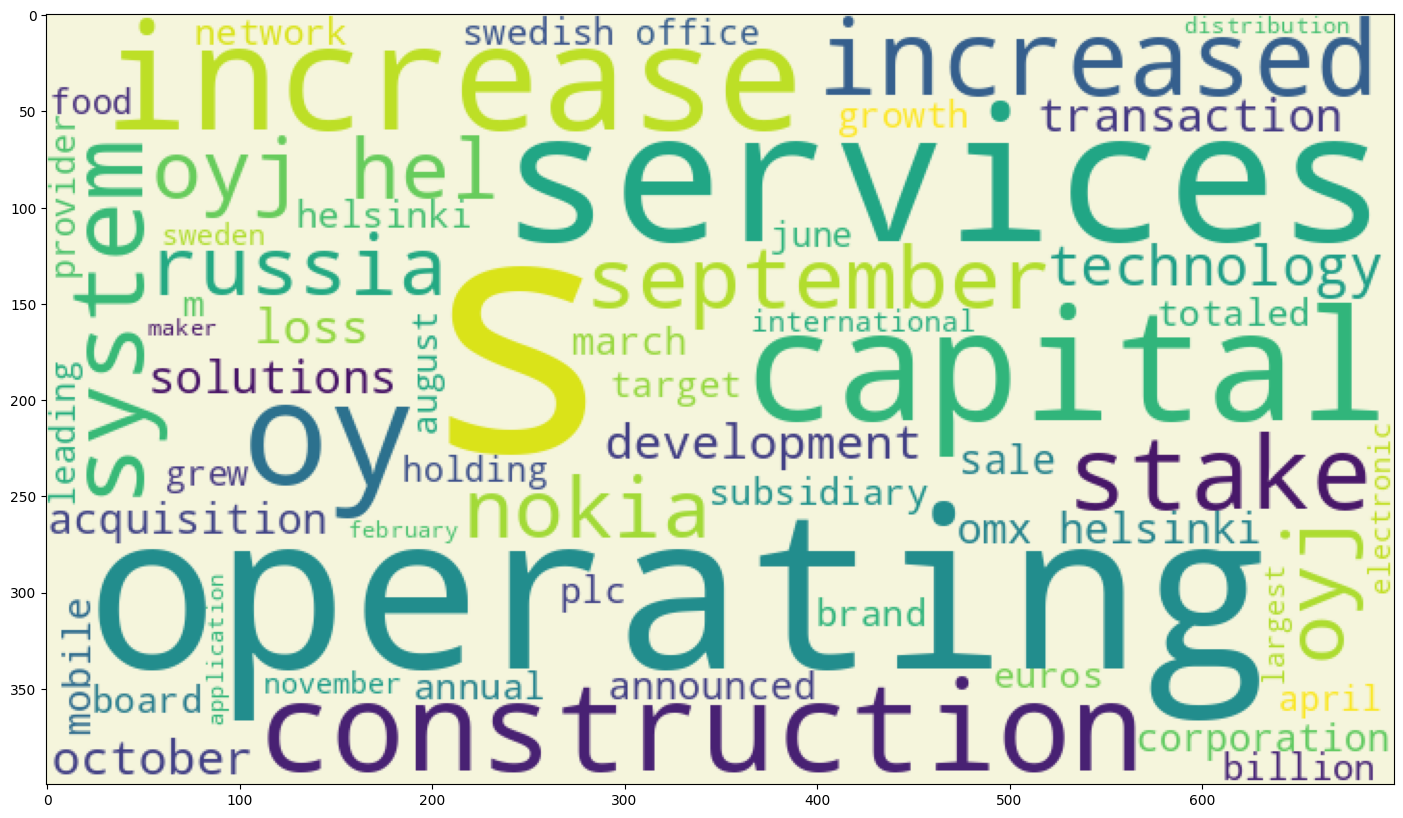

In [42]:
neutral_wordcloud = WordCloud(width=700, height=400, background_color='beige', max_words=60, stopwords=current_stopwords).generate(' '.join(neutral_tokens))
plt.figure(figsize=(20,10))
plt.imshow(neutral_wordcloud)

#Observations from the neutral word cloud
1. Some sectors which feature are the services sector and construction. References are made to technology and mobile networks.
2. Some places which are mentioned include Russia, Sweden and Helsinki.
3. The months of March and June are mentioned in particular. Would need further contextual information to understand what that could mean.
4. Companies mentioned include Nokia.

#Generate the wordcloud with articles which received a positive Sentiment rating from Textblob

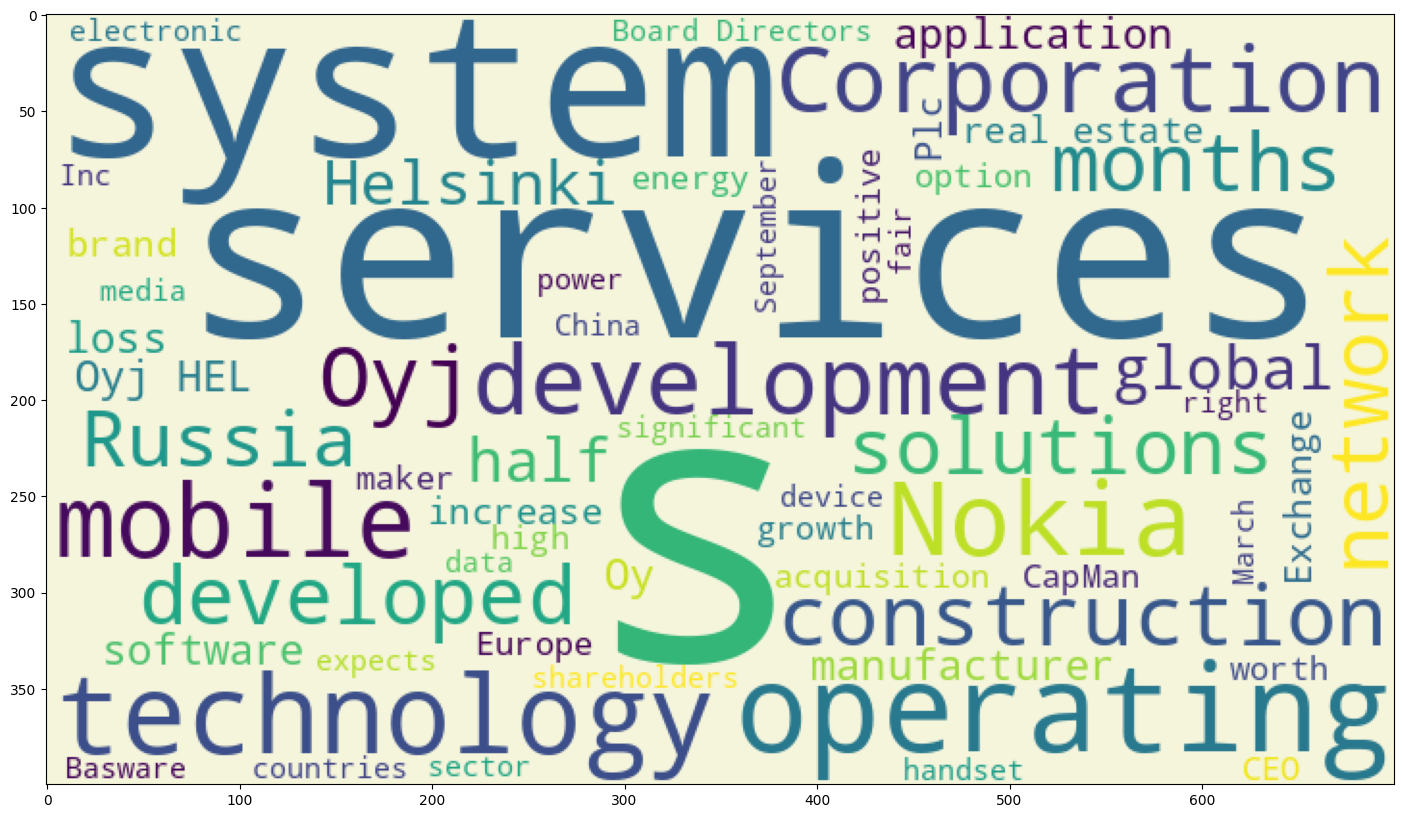

In [43]:
positive_wordcloud = WordCloud(width=700, height=400, background_color='beige', max_words=60, stopwords=current_stopwords).generate(' '.join(positive_tokens))
plt.figure(figsize=(20,10))
plt.imshow(positive_wordcloud)

#Observations from the positive word cloud
1. Some sectors which feature are the services sector and technology, and to a lesser extent, data, real estate, electronic and media. References are made to mobile/software/application/solutons etc. The Construction sector is also mentioned, and is slightly bigger than the mention in the negative wordcloud.
2. Some places which are mentioned include Russia, China and Helsinki.
3. The months of March and September are mentioned in particular. Would need further contextual information to understand what that could mean.